In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Custom Neural Network class
class NeuralNetwork:
    def __init__(self):
        # Initialize parameters
        self.input_size = 2
        self.hidden_size = 2
        self.output_size = 1
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        # Activation function
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, output):
        # Derivative of the sigmoid function
        return output * (1 - output)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        # Backward propagation
        self.error = y - output
        self.delta2 = self.error * self.sigmoid_derivative(output)
        self.Delta2 = np.dot(self.a1.T, self.delta2)
        self.Delta1 = np.dot(self.delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

    def update_weights(self, eta):
        # Update weights
        self.W2 += eta * self.Delta2
        self.b2 += eta * np.sum(self.delta2, axis=0, keepdims=True)
        self.W1 += eta * self.Delta1
        self.b1 += eta * np.sum(self.Delta1, axis=0)

    def train(self, X, y, epochs, eta):
        # Training function
        for epoch in range(epochs):
            sum_error = 0
            for i in range(len(X)):
                output = self.forward(X[i])
                self.backward(X[i], y[i], output)
                self.update_weights(eta)
                sum_error += np.sum((self.error) ** 2)
            print(f'Epoch {epoch+1}/{epochs}, Error={sum_error/len(X)}')


In [4]:
# Load data
input_data = np.loadtxt('input.csv', delimiter=',')
target_data = np.loadtxt('target.csv')

# Prepare data
X = input_data
y = target_data.reshape(-1, 1)

# Create neural network
nn = NeuralNetwork()

# Train neural network
nn.train(X, y, epochs=1000, eta=0.1)

Epoch 1/1000, Error=0.034715286426392274
Epoch 2/1000, Error=0.02937441778138923
Epoch 3/1000, Error=0.029338994038046552
Epoch 4/1000, Error=0.02933842473956473
Epoch 5/1000, Error=0.029338176504660893
Epoch 6/1000, Error=0.029337941895095435
Epoch 7/1000, Error=0.029337709018748135
Epoch 8/1000, Error=0.02933747724993322
Epoch 9/1000, Error=0.02933724657602791
Epoch 10/1000, Error=0.029337017018380464
Epoch 11/1000, Error=0.029336788599948586
Epoch 12/1000, Error=0.029336561343483426
Epoch 13/1000, Error=0.029336335271425557
Epoch 14/1000, Error=0.02933611040589629
Epoch 15/1000, Error=0.029335886768695432
Epoch 16/1000, Error=0.029335664381298882
Epoch 17/1000, Error=0.029335443264856428
Epoch 18/1000, Error=0.029335223440189805
Epoch 19/1000, Error=0.02933500492779057
Epoch 20/1000, Error=0.02933478774781857
Epoch 21/1000, Error=0.029334571920099726
Epoch 22/1000, Error=0.029334357464124806
Epoch 23/1000, Error=0.029334144399047624
Epoch 24/1000, Error=0.029333932743683566
Epoch 25

In [ ]:

# Test neural network
test_input = input_data[:6]
print('Test inputs:')
print(test_input)
outputs = [nn.forward(x) for x in test_input]
print('Output values:')
print(np.round(outputs, 1))
expected = target_data[:6]
print('Expected values:')
print(expected)

# Simulate traffic light controller
image_files = [
    'crossroadRG.jpg',
    'crossroadRA.jpg',
    'crossroadRR.jpg',
    'crossroadGR.jpg',
    'crossroadAR.jpg',
    'crossroadRR.jpg'
]

prev = 0.6
current = 0.1

plt.ion()  # Enable interactive mode

Test inputs:
[[0.1 0.2]
 [0.2 0.3]
 [0.3 0.4]
 [0.4 0.5]
 [0.5 0.6]
 [0.6 0.1]]
Output values:
[[[0.4]]

 [[0.4]]

 [[0.3]]

 [[0.3]]

 [[0.3]]

 [[0.4]]]
Expected values:
[0.3 0.4 0.5 0.6 0.1 0.2]


0.6 0.1 0.4


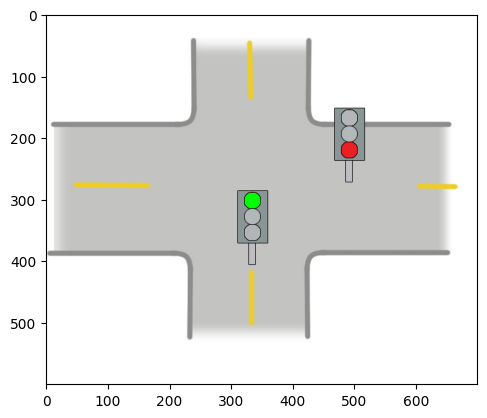

0.1 0.4 0.4


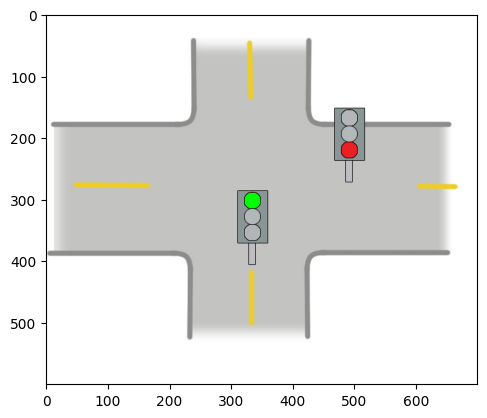

0.4 0.4 0.3


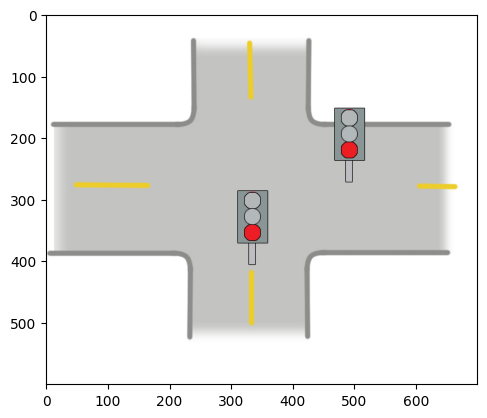

0.4 0.3 0.3


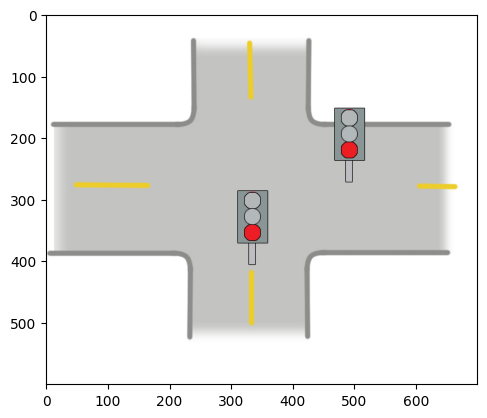

0.3 0.3 0.4


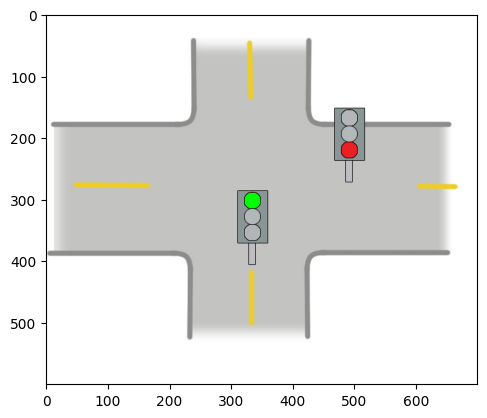

0.3 0.4 0.3


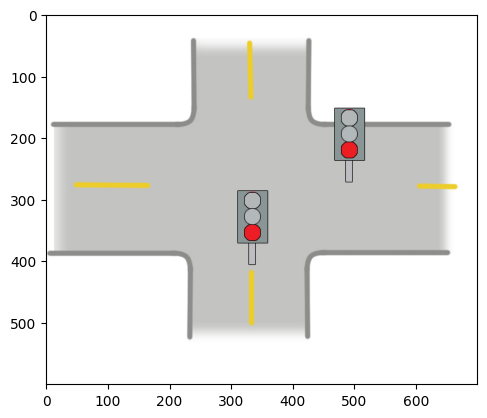

0.4 0.3 0.3


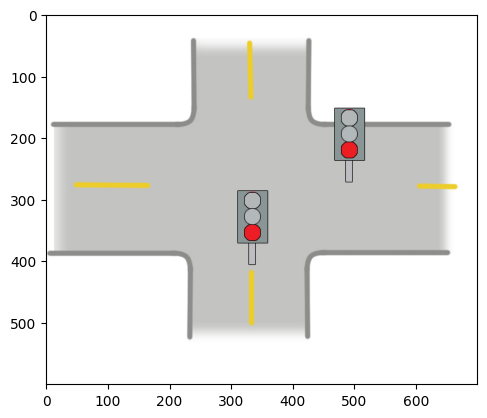

0.3 0.3 0.4


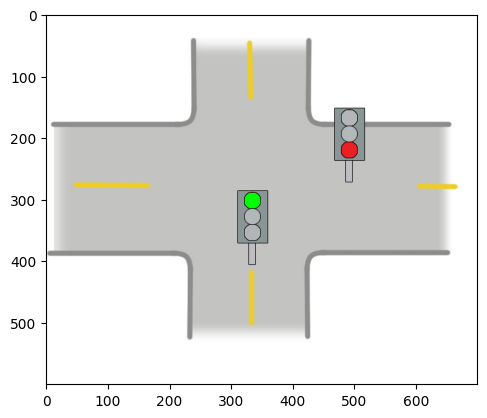

0.3 0.4 0.3


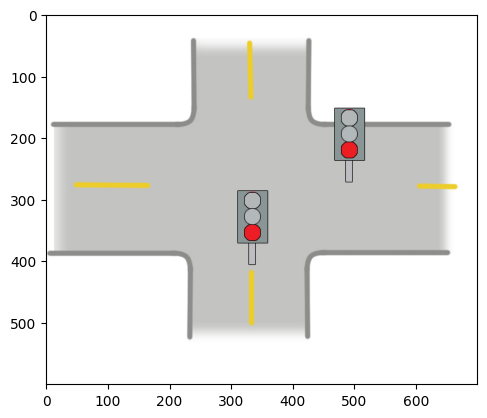

0.4 0.3 0.3


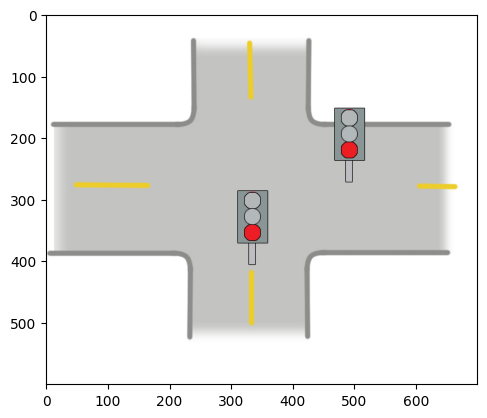

0.3 0.3 0.4


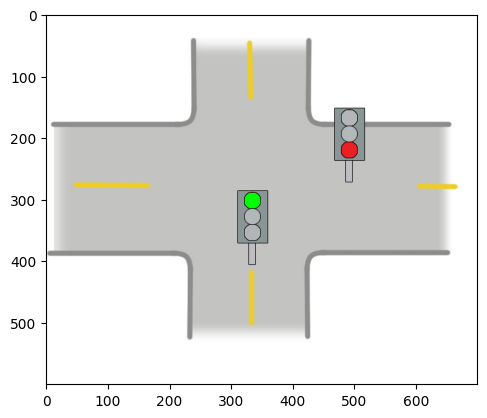

0.3 0.4 0.3


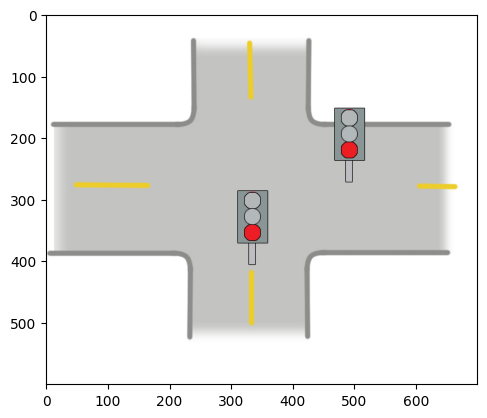

0.4 0.3 0.3


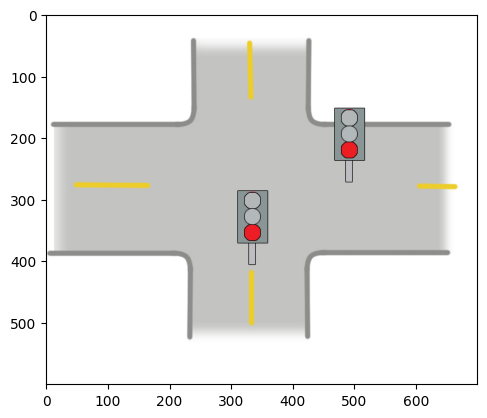

0.3 0.3 0.4


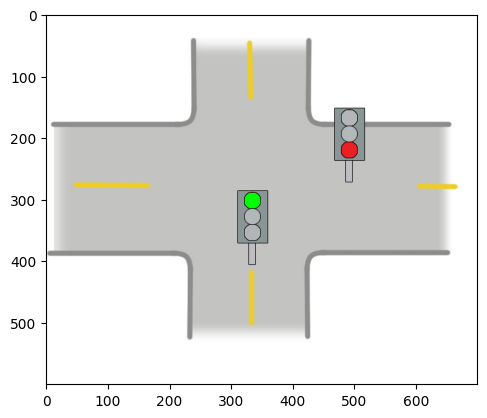

0.3 0.4 0.3


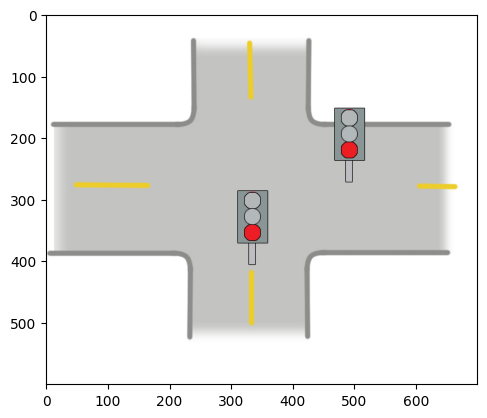

0.4 0.3 0.3


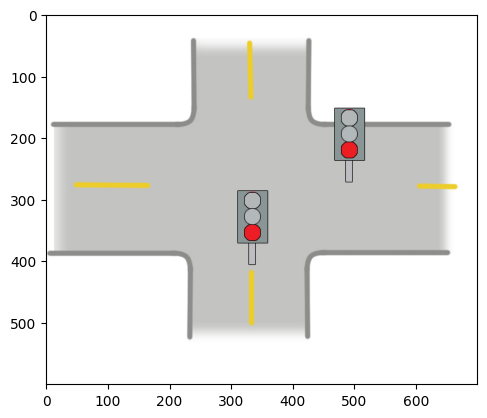

0.3 0.3 0.4


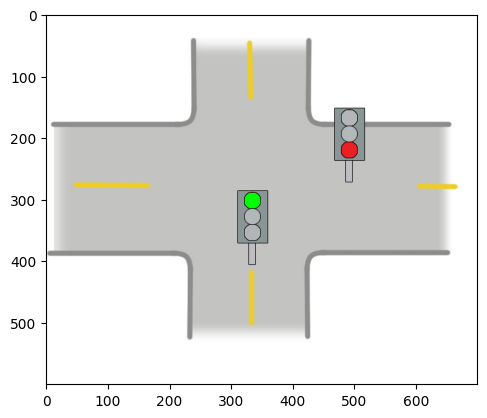

0.3 0.4 0.3


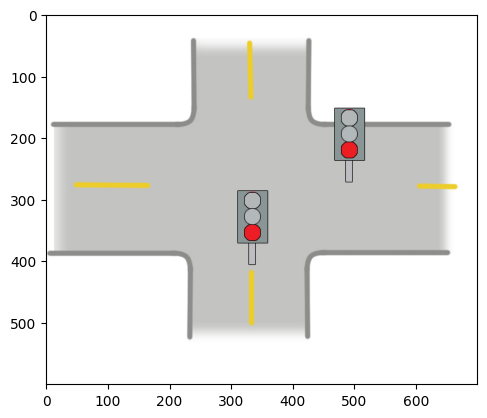

0.4 0.3 0.3


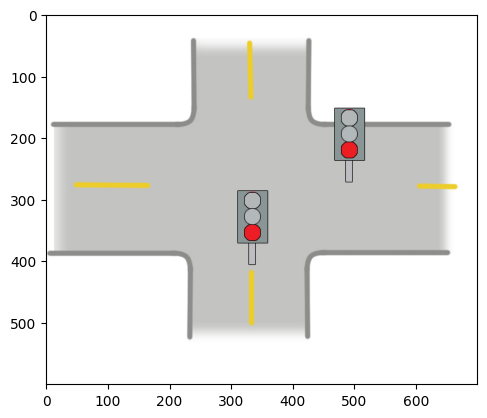

0.3 0.3 0.4


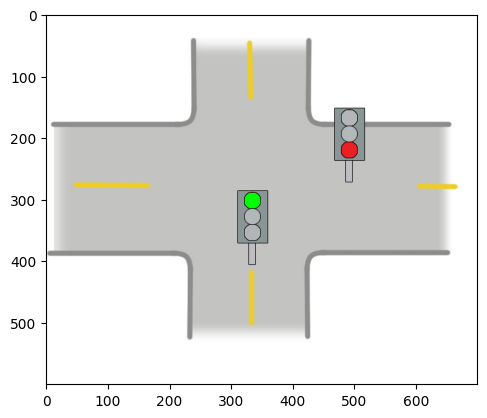

0.3 0.4 0.3


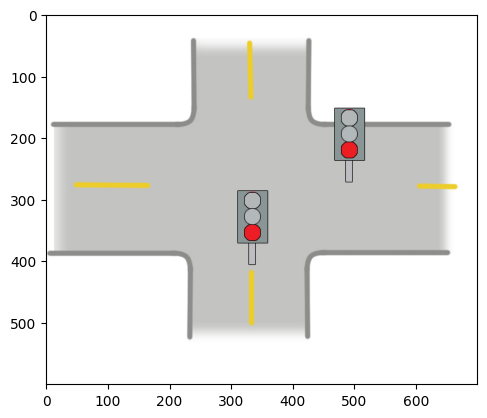

0.4 0.3 0.3


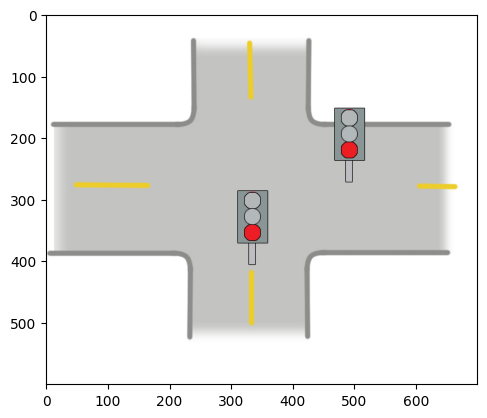

0.3 0.3 0.4


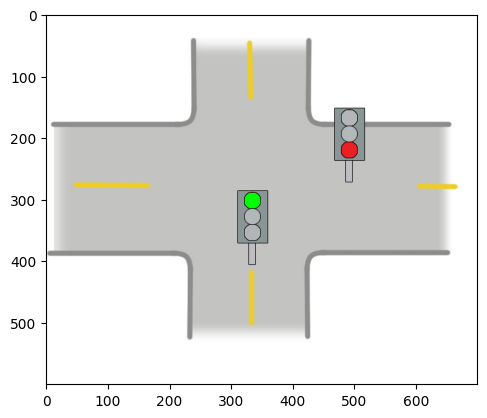

0.3 0.4 0.3


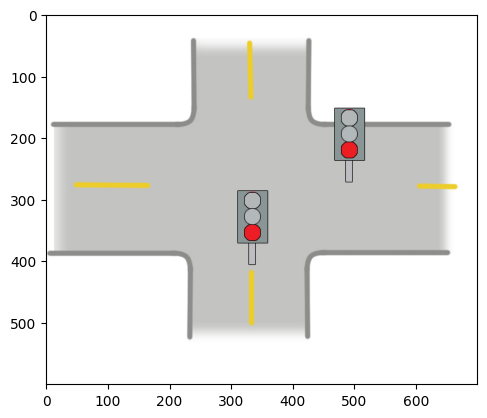

0.4 0.3 0.3


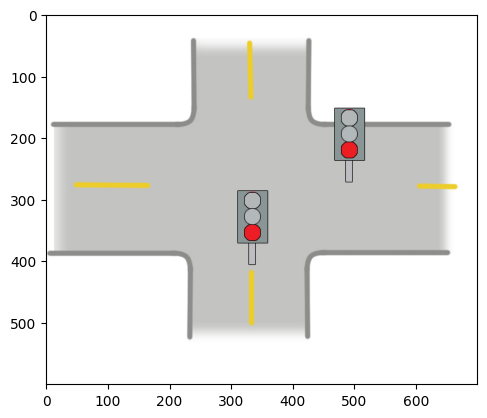

0.3 0.3 0.4


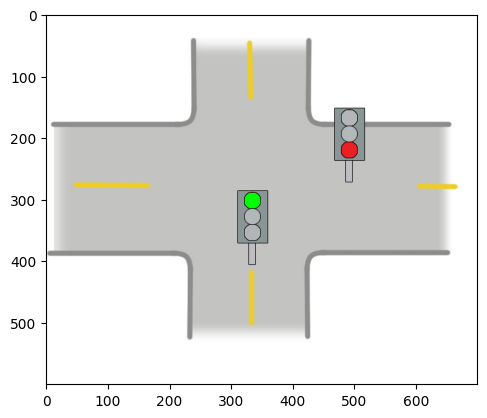

0.3 0.4 0.3


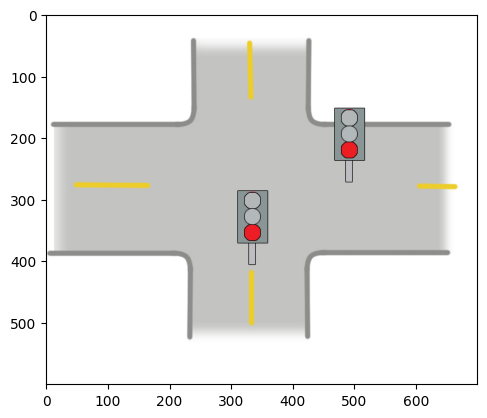

0.4 0.3 0.3


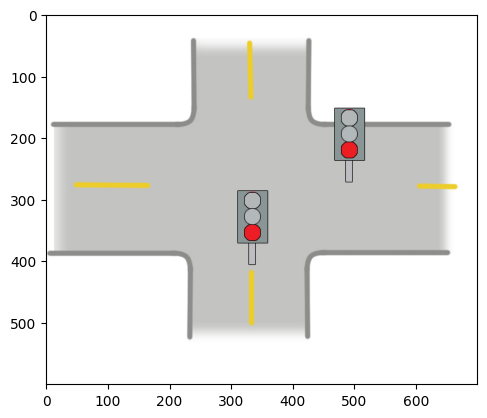

0.3 0.3 0.4


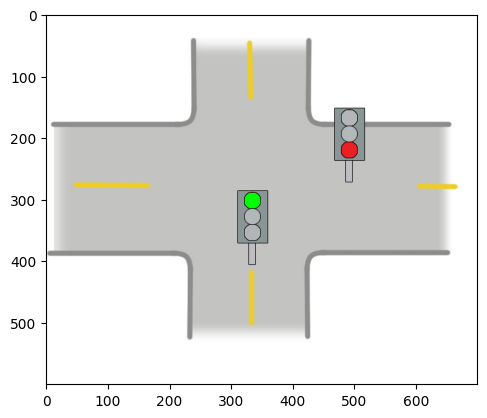

0.3 0.4 0.3


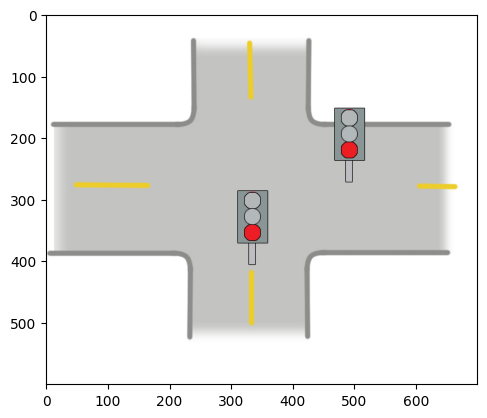

0.4 0.3 0.3


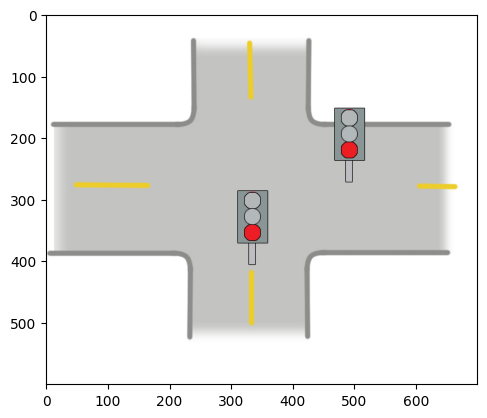

0.3 0.3 0.4


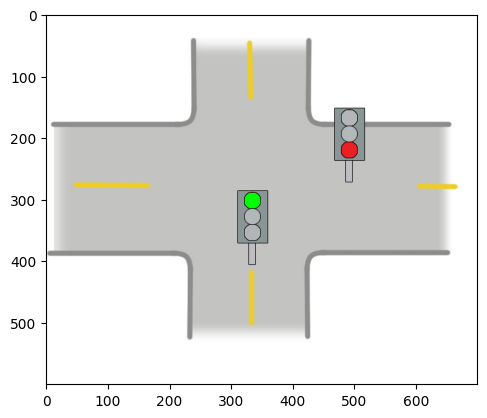

KeyboardInterrupt: 

In [13]:
while True:
    output = nn.forward(np.array([[prev, current]]))
    next_state = output[0][0]  # Extract the scalar value from the array
    next_state = round(next_state, 1)
    print(f'{prev} {current} {next_state}')

    img_idx = int(next_state * 10) - 1
    img = cv2.imread(image_files[img_idx])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.pause(1)

    prev = current
    current = next_state
